In [13]:
import pandas as pd
import Levenshtein
from pyjarowinkler import distance as jaro_distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataseti yükləmək
df = pd.read_csv("synthetic_card_data.csv")

df.head()

,Customer ID,Card Number,CVV,Expiry Date
0,1,5678 1234 5678 9876,125,12/25
1,2,1234 5678 9876 5432,123,11/24
2,3,1234 5678 9876 5431,125,11/24
3,4,1234 5678 9876 5433,125,01/24
4,5,1234 5678 9876 5431,124,11/24


In [14]:
def calculate_levenshtein_distance(str1, str2):
    if pd.isna(str1) or pd.isna(str2):  # Əgər boşdursa, 0 qaytarırıq
        return 0
    
    len_s1, len_s2 = len(str1), len(str2)
    dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

    for i in range(len_s1 + 1):
        for j in range(len_s2 + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    return dp[len_s1][len_s2]

# Hamming Distance
def calculate_hamming_distance(str1, str2):
    if len(str1) != len(str2):
        return np.nan  # Hamming distance üçün eyni uzunluq lazımdır
    return sum(el1 != el2 for el1, el2 in zip(str1, str2))

# Jaro-Winkler Distance
def calculate_jaro_winkler_distance(str1, str2):
    return jaro_distance.get_jaro_distance(str1, str2)

comparison_value_card = "1234 5678 9876 5432"  # Boşluqsuz istifadə edək ki, məsafə dəqiq olsun
comparison_value_cvv = "123"

df['Levenshtein Card'] = df['Card Number'].apply(lambda x: calculate_levenshtein_distance(str(x), comparison_value_card))
df['Hamming Card'] = df['Card Number'].apply(lambda x: calculate_hamming_distance(str(x), comparison_value_card))
df['Jaro-Winkler Card'] = df['Card Number'].apply(lambda x: calculate_jaro_winkler_distance(str(x), comparison_value_card))

df['Levenshtein CVV'] = df['CVV'].apply(lambda x: calculate_levenshtein_distance(str(x), comparison_value_cvv))
df['Hamming CVV'] = df['CVV'].apply(lambda x: calculate_hamming_distance(str(x), comparison_value_cvv))
df['Jaro-Winkler CVV'] = df['CVV'].apply(lambda x: calculate_jaro_winkler_distance(str(x), comparison_value_cvv))


# Nəticələri göstərmək
print(df[['Customer ID', 'Card Number', 'Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card', 
          'CVV', 'Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']])





    Customer ID          Card Number  Levenshtein Card  Hamming Card  \
0             1  5678 1234 5678 9876                10            15   
1             2  1234 5678 9876 5432                 0             0   
2             3  1234 5678 9876 5431                 1             1   
3             4  1234 5678 9876 5433                 1             1   
4             5  1234 5678 9876 5431                 1             1   
..          ...                  ...               ...           ...   
95           96  1234 5678 9876 5433                 1             1   
96           97  1234 5678 9876 5431                 1             1   
97           98  1234 5678 9876 5432                 0             0   
98           99  1234 5678 9876 5432                 0             0   
99          100  1234 5678 9876 5431                 1             1   

    Jaro-Winkler Card  CVV  Levenshtein CVV  Hamming CVV  Jaro-Winkler CVV  
0                0.23  125                1            1  

In [15]:
df[['Customer ID', 'Card Number', 'Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card', 
          'CVV', 'Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']]

,Customer ID,Card Number,Levenshtein Card,Hamming Card,Jaro-Winkler Card,CVV,Levenshtein CVV,Hamming CVV,Jaro-Winkler CVV
0,1,5678 1234 5678 9876,10,15,0.23,125,1,1,0.22
1,2,1234 5678 9876 5432,0,0,0.00,123,0,0,0.00
2,3,1234 5678 9876 5431,1,1,0.04,125,1,1,0.22
3,4,1234 5678 9876 5433,1,1,0.04,125,1,1,0.22
4,5,1234 5678 9876 5431,1,1,0.04,124,1,1,0.22
...,...,...,...,...,...,...,...,...,...
95,96,1234 5678 9876 5433,1,1,0.04,123,0,0,0.00
96,97,1234 5678 9876 5431,1,1,0.04,126,1,1,0.22
97,98,1234 5678 9876 5432,0,0,0.00,123,0,0,0.00
98,99,1234 5678 9876 5432,0,0,0.00,124,1,1,0.22


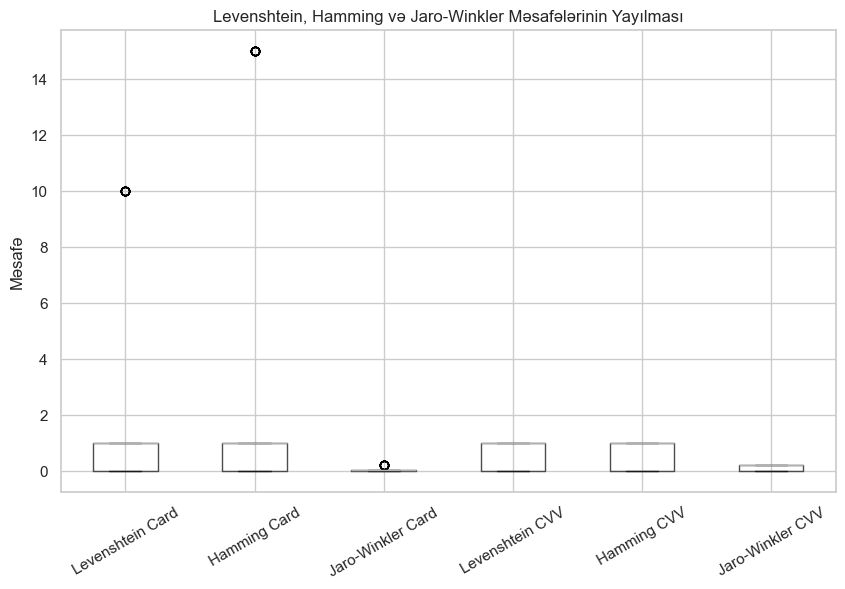

In [16]:
plt.figure(figsize=(10, 6))
df[['Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card', 'Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']].boxplot()
plt.title('Levenshtein, Hamming və Jaro-Winkler Məsafələrinin Yayılması')
plt.ylabel('Məsafə')
plt.xticks(rotation=30)
plt.show()


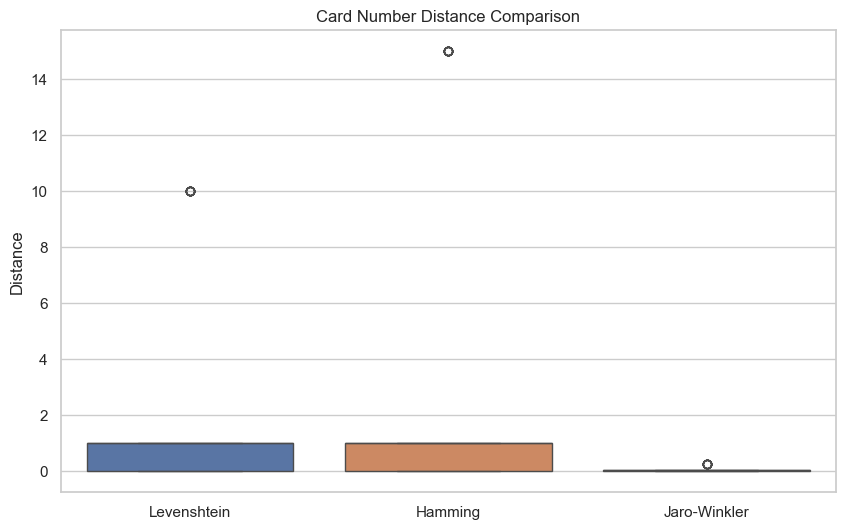

In [17]:
# Vizualizasiya üçün qrafiklər
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Card nömrəsi distancelarını müqayisə edirik
sns.boxplot(data=df[['Levenshtein Card', 'Hamming Card', 'Jaro-Winkler Card']])
plt.title("Card Number Distance Comparison")
plt.ylabel("Distance")
plt.xticks([0, 1, 2], ['Levenshtein', 'Hamming', 'Jaro-Winkler'])
plt.show()

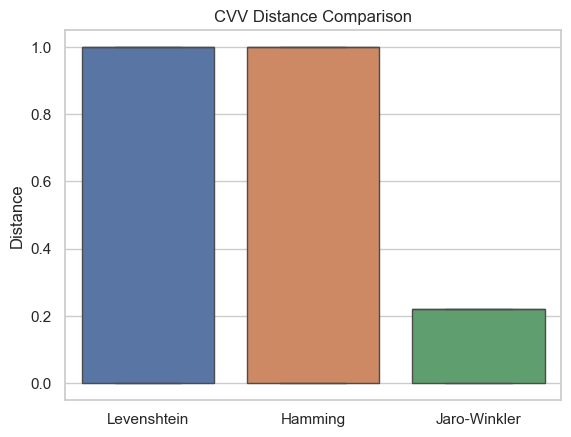

In [18]:
# CVV distancelarını müqayisə edirik
sns.boxplot(data=df[['Levenshtein CVV', 'Hamming CVV', 'Jaro-Winkler CVV']])
plt.title("CVV Distance Comparison")
plt.ylabel("Distance")
plt.xticks([0, 1, 2], ['Levenshtein', 'Hamming', 'Jaro-Winkler'])
plt.show()